#**Swiggy Banglore Outlet Analysis**


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [ ]:
df_swiggy = pd.read_csv('/content/Swiggy data.csv')

df_swiggy.head()

,Shop_Name,Cuisine,Location,Rating,Cost_for_Two
0,Kanti Sweets,Sweets,"Koramangala, Koramangala",4.3,₹ 150
1,Mumbai Tiffin,"North Indian, Home Food, Thalis, Combo","Sector 5, HSR",4.4,₹ 400
2,Sri Krishna sagar,"South Indian, North Indian, Fast Food, Beverag...","6th Block, Koramangala",4.1,₹ 126
3,Al Daaz,"American, Arabian, Chinese, Desserts, Fast Foo...","HSR, HSR",4.4,₹ 400
4,Beijing Bites,"Chinese, Thai","5th Block, Koramangala",4.1,₹ 450


In [ ]:
df_swiggy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 118 entries, 0 to 117
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Shop_Name     118 non-null    object
 1   Cuisine       118 non-null    object
 2   Location      118 non-null    object
 3   Rating        118 non-null    object
 4   Cost_for_Two  118 non-null    object
dtypes: object(5)
memory usage: 4.7+ KB


In [ ]:
#Check for Null values
df_swiggy.isnull().sum()

Shop_Name       0
Cuisine         0
Location        0
Rating          0
Cost_for_Two    0
dtype: int64

# **DATA CLEANING**

In [ ]:
#Checking Duplicated Values
df_swiggy.duplicated().sum()

0

In [ ]:
#Unique Values in Column Cost_for_Two
df_swiggy['Cost_for_Two'].unique()

array(['₹ 150', '₹ 400', '₹ 126', '₹ 450', '₹ 350', '₹ 200', '₹ 500',
       '₹ 247', '₹ 550', '₹ 300', '₹ 129', '₹ 250', '₹ 268', '₹ 600',
       '₹ 527', '₹ 130', '₹ 257', '₹ 280', '₹ 399', '₹ 220', '₹ 800',
       '₹ 100', '₹ 178', '₹ 120', '₹ 251', '₹ 650', '₹ 132', '₹ 153',
       '₹ 219', '₹ 193'], dtype=object)

In [ ]:
#Converting Cost_for_Two in integer by removing Symbol
df_swiggy['Cost_for_Two']= df_swiggy['Cost_for_Two'].str.replace('₹','').astype(int)
df_swiggy

,Shop_Name,Cuisine,Location,Rating,Cost_for_Two
0,Kanti Sweets,Sweets,"Koramangala, Koramangala",4.3,150
1,Mumbai Tiffin,"North Indian, Home Food, Thalis, Combo","Sector 5, HSR",4.4,400
2,Sri Krishna sagar,"South Indian, North Indian, Fast Food, Beverag...","6th Block, Koramangala",4.1,126
3,Al Daaz,"American, Arabian, Chinese, Desserts, Fast Foo...","HSR, HSR",4.4,400
4,Beijing Bites,"Chinese, Thai","5th Block, Koramangala",4.1,450
...,...,...,...,...,...
113,Wok Paper Scissors,"Pan-Asian, Chinese, Asian","JNC Road, Koramangala",3.9,219
114,Savoury Restaurant,"Arabian, Middle Eastern, North Indian, Grill, ...","Madiwala, BTM",4.1,600
115,Royal Treat,"North Indian, Chinese, Seafood, Biryani","5th block Koramangala, Koramangala",4.2,193
116,Thali 99,North Indian,"Koramangala, Koramangala",4.3,200


In [ ]:
#Rename Column
df_swiggy.rename(columns={'Cost_for_Two': 'Cost_for_Two(₹)'},inplace=True)
df_swiggy.head()

,Shop_Name,Cuisine,Location,Rating,Cost_for_Two(₹)
0,Kanti Sweets,Sweets,"Koramangala, Koramangala",4.3,150
1,Mumbai Tiffin,"North Indian, Home Food, Thalis, Combo","Sector 5, HSR",4.4,400
2,Sri Krishna sagar,"South Indian, North Indian, Fast Food, Beverag...","6th Block, Koramangala",4.1,126
3,Al Daaz,"American, Arabian, Chinese, Desserts, Fast Foo...","HSR, HSR",4.4,400
4,Beijing Bites,"Chinese, Thai","5th Block, Koramangala",4.1,450


In [ ]:
#Unique ratings
df_swiggy['Rating'].unique()

array(['4.3', '4.4', '4.1', '4.2', '3.9', '3.8', '4', '3.7', '3.6', '4.8',
       '4.5', '4.6', '--'], dtype=object)

In [ ]:
#Replace -- with 0
df_swiggy['Rating']= df_swiggy['Rating'].replace('--','0').astype(float)
df_swiggy['Rating'].unique()

array([4.3, 4.4, 4.1, 4.2, 3.9, 3.8, 4. , 3.7, 3.6, 4.8, 4.5, 4.6, 0. ])

In [ ]:
#Columns in Dataset with Data types
df_swiggy.dtypes

Shop_Name           object
Cuisine             object
Location            object
Rating             float64
Cost_for_Two(₹)      int64
dtype: object

In [ ]:
df_swiggy.describe()

,Rating,Cost_for_Two(₹)
count,118.000000,118.000000
mean,4.061864,321.008475
std,0.430845,137.286804
min,0.000000,100.000000
25%,4.000000,204.750000
50%,4.100000,300.000000
75%,4.300000,400.000000
max,4.800000,800.000000


## Observation





1.   Average Cost_for_Two members is Rs 321.
2.   Average rating for the restaurants is 4.06.
3.   Max rating and Cost_for_two is 4.8 and Rs 800.
4.   Min rating and Cost_for_two is 0.0 and Rs 100.



# **Data Preprocessing**

In [ ]:
df_swiggy.head()

,Shop_Name,Cuisine,Location,Rating,Cost_for_Two(₹)
0,Kanti Sweets,Sweets,"Koramangala, Koramangala",4.3,150
1,Mumbai Tiffin,"North Indian, Home Food, Thalis, Combo","Sector 5, HSR",4.4,400
2,Sri Krishna sagar,"South Indian, North Indian, Fast Food, Beverag...","6th Block, Koramangala",4.1,126
3,Al Daaz,"American, Arabian, Chinese, Desserts, Fast Foo...","HSR, HSR",4.4,400
4,Beijing Bites,"Chinese, Thai","5th Block, Koramangala",4.1,450


In [ ]:
# Split the 'Location' column into two new columns based on the last comma
df_swiggy[['Location', 'Area']] = df_swiggy['Location'].str.rsplit(', ', n=1, expand=True)

In [ ]:
df_swiggy.head()

,Shop_Name,Cuisine,Location,Rating,Cost_for_Two(₹),Area
0,Kanti Sweets,Sweets,Koramangala,4.3,150,Koramangala
1,Mumbai Tiffin,"North Indian, Home Food, Thalis, Combo",Sector 5,4.4,400,HSR
2,Sri Krishna sagar,"South Indian, North Indian, Fast Food, Beverag...",6th Block,4.1,126,Koramangala
3,Al Daaz,"American, Arabian, Chinese, Desserts, Fast Foo...",HSR,4.4,400,HSR
4,Beijing Bites,"Chinese, Thai",5th Block,4.1,450,Koramangala


In [ ]:
df_swiggy['Area'].unique()

array(['Koramangala', 'HSR', 'BTM', 'Jayanagar'], dtype=object)

In [ ]:
# No. of restaurants in Koramangala
df_Koramangala =df_swiggy[df_swiggy['Area'].str.contains('Koramangala')]
df_Koramangala

,Shop_Name,Cuisine,Location,Rating,Cost_for_Two(₹),Area
0,Kanti Sweets,Sweets,Koramangala,4.3,150,Koramangala
2,Sri Krishna sagar,"South Indian, North Indian, Fast Food, Beverag...",6th Block,4.1,126,Koramangala
4,Beijing Bites,"Chinese, Thai",5th Block,4.1,450,Koramangala
5,Kitchens of Punjab,North Indian,Koramangala 4th Block,4.2,350,Koramangala
9,Yumlane Pizza,"Pizzas, Italian, Mexican",9th Main road,3.8,150,Koramangala
...,...,...,...,...,...,...
112,Kritunga,"Andhra, Biryani",5th Block,3.9,500,Koramangala
113,Wok Paper Scissors,"Pan-Asian, Chinese, Asian",JNC Road,3.9,219,Koramangala
115,Royal Treat,"North Indian, Chinese, Seafood, Biryani",5th block Koramangala,4.2,193,Koramangala
116,Thali 99,North Indian,Koramangala,4.3,200,Koramangala


In [ ]:
# No. of restaurants in HSR
df_HSR =df_swiggy[df_swiggy['Area'].str.contains('HSR')]
df_HSR

,Shop_Name,Cuisine,Location,Rating,Cost_for_Two(₹),Area
1,Mumbai Tiffin,"North Indian, Home Food, Thalis, Combo",Sector 5,4.4,400,HSR
3,Al Daaz,"American, Arabian, Chinese, Desserts, Fast Foo...",HSR,4.4,400,HSR
8,Hotel Manu,"South Indian, Kerala, Chinese, North Indian",HSR,4.1,350,HSR
19,Shree Khana Khazana,"Indian, Rajasthani",Sector 4,4.1,350,HSR
24,New Udupi Grand,"Chinese, Jain, North Indian, South Indian",HSR,4.3,150,HSR
36,Biriyani Zone,"North Indian, Chinese, Biryani",HSR 1st sector,4.1,600,HSR
37,Gongura's,"North Indian, Chinese, Biryani",Sector 7,3.8,300,HSR
39,Leon Grill,"Turkish, Portuguese, American",3rd Sector,4.3,300,HSR
41,Cakewala,Desserts,HSR,4.3,450,HSR
57,Donne Biriyani House,South Indian,3rd sector,4.0,300,HSR


In [ ]:
# No. of restaurants in in BTM
df_BTM =df_swiggy[df_swiggy['Area'].str.contains('BTM')]
df_BTM

,Shop_Name,Cuisine,Location,Rating,Cost_for_Two(₹),Area
6,99 VARIETY DOSA AND PAV BHAJI- Malli Mane Food...,"Fast Food, North Indian, Chinese",BTM 2nd Stage,4.1,200,BTM
7,La Pino'z Pizza,Italian,BTM,3.9,500,BTM
10,Ambur Star Briyani,"Chinese, South Indian, North Indian, Desserts,...",outer ring road,4.1,500,BTM
17,Sri Lakshmi Dhaba,North Indian,Bommanahalli,3.7,200,BTM
20,Just Bake - Cakes & confectioners,"Desserts, Bakery",BTM 1st stage,4.3,300,BTM
22,Hotel Godavari,"North Indian, Chinese, Hyderabadi",Marutinagar Main Road,4.0,400,BTM
25,Swad Punjab da,Indian,BTM,4.1,250,BTM
27,High N Hungry,"Andhra, Biryani, Chinese, Desserts, Fast Food,...",4th Cross,4.1,350,BTM
31,Bengali Fun Foods,North Indian,BTM 2nd stage,4.2,300,BTM
33,Oottupura,"Kerala, South Indian",BTM,4.3,268,BTM


# **Data Analysis**

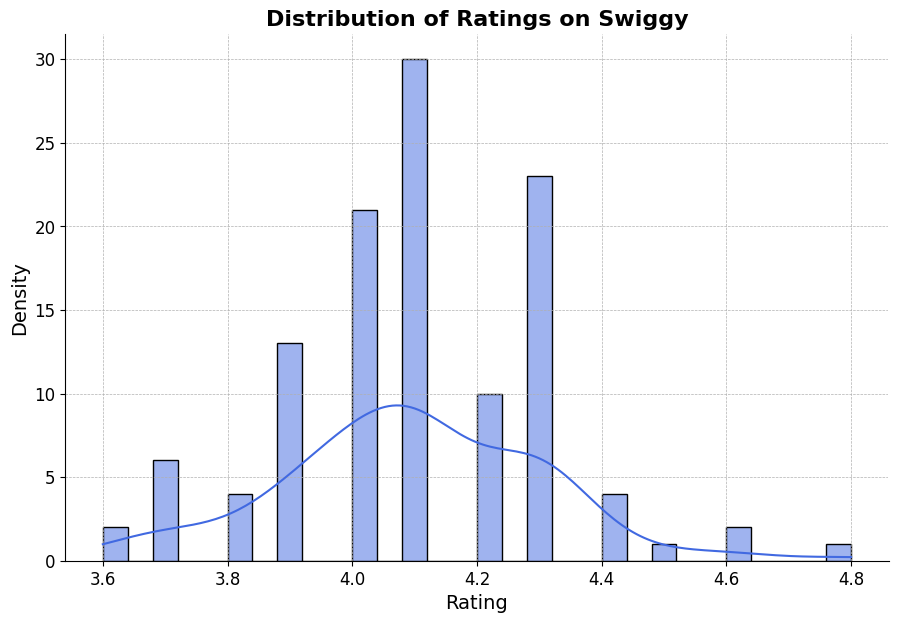

In [ ]:
# Rating Distribution in all areas
filtered_df = df_swiggy[df_swiggy['Rating'] > 0]
sns.displot(filtered_df['Rating'], kde=True, color='royalblue', height=6, aspect=1.5, bins=30, edgecolor='black')
plt.title('Distribution of Ratings on Swiggy', fontsize=16, fontweight='bold')
plt.xlabel('Rating', fontsize=14)
plt.ylabel('Density', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.show()

### Conclusion
From this Distribution Plot, We can conclude that More that '50%' of Restaurants are having a Rating greater than "4.1" with a Maximum Rating of "4.8"

## Area Wise Analysis

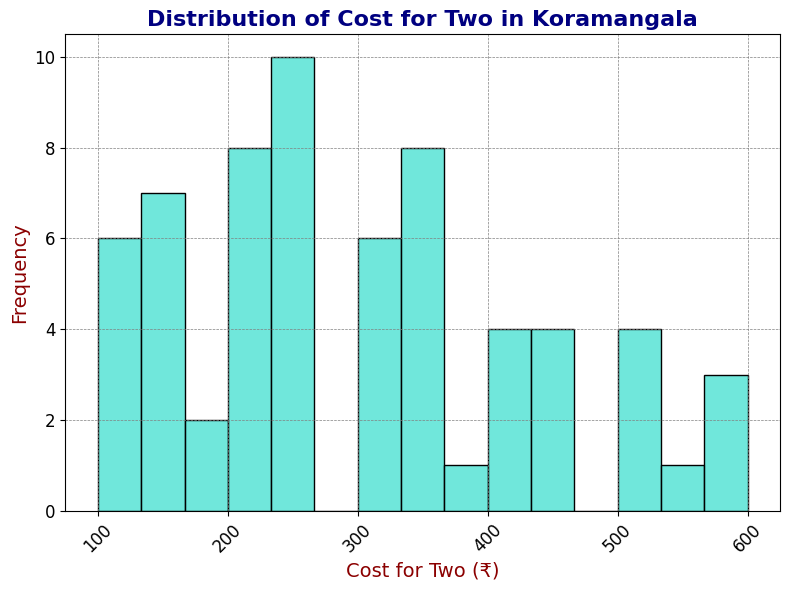

In [ ]:
#For Koramangala : cost for two
plt.figure(figsize=(8, 6))
sns.histplot(df_Koramangala['Cost_for_Two(₹)'], bins=15, color='turquoise', edgecolor='black')
plt.title('Distribution of Cost for Two in Koramangala', fontsize=16, fontweight='bold', color='navy')
plt.xlabel('Cost for Two (₹)', fontsize=14, color='darkred')
plt.ylabel('Frequency', fontsize=14, color='darkred')

plt.xticks(fontsize=12, rotation=45)
plt.yticks(fontsize=12)
plt.grid(True, which='major', linestyle='--', linewidth=0.5, color='grey')
plt.tight_layout()
plt.show()

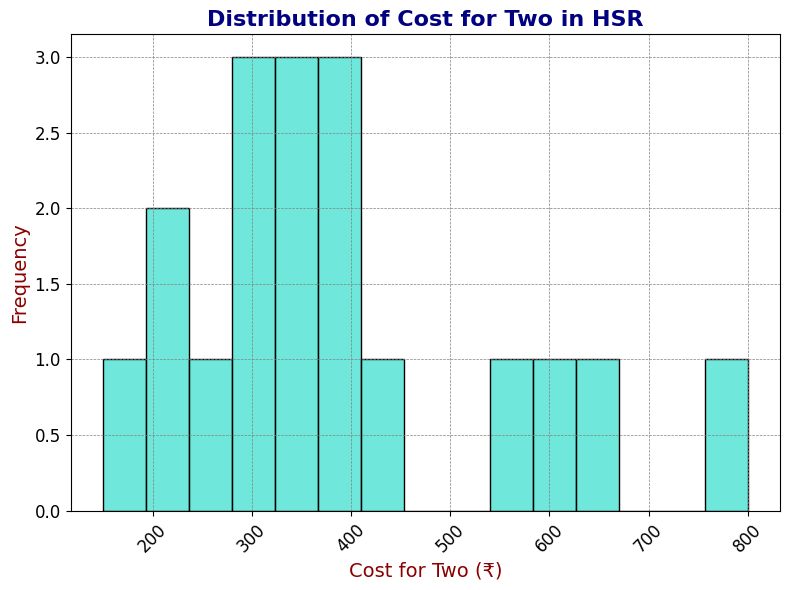

In [ ]:
#For HSR : cost for two
plt.figure(figsize=(8, 6))
sns.histplot(df_HSR['Cost_for_Two(₹)'], bins=15, color='turquoise', edgecolor='black')
plt.title('Distribution of Cost for Two in HSR', fontsize=16, fontweight='bold', color='navy')
plt.xlabel('Cost for Two (₹)', fontsize=14, color='darkred')
plt.ylabel('Frequency', fontsize=14, color='darkred')

plt.xticks(fontsize=12, rotation=45)
plt.yticks(fontsize=12)
plt.grid(True, which='major', linestyle='--', linewidth=0.5, color='grey')
plt.tight_layout()
plt.show()

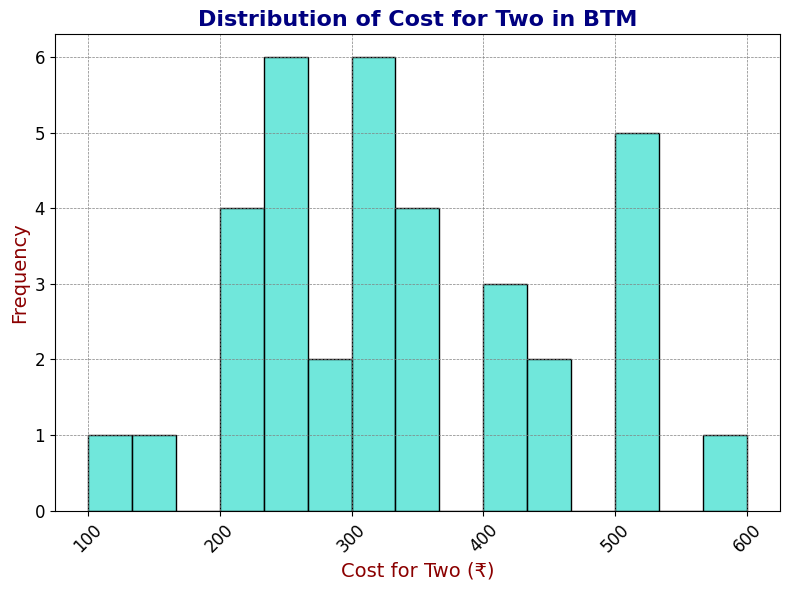

In [ ]:
#For BTM : cost for two
plt.figure(figsize=(8, 6))
sns.histplot(df_BTM['Cost_for_Two(₹)'], bins=15, color='turquoise', edgecolor='black')
plt.title('Distribution of Cost for Two in BTM', fontsize=16, fontweight='bold', color='navy')
plt.xlabel('Cost for Two (₹)', fontsize=14, color='darkred')
plt.ylabel('Frequency', fontsize=14, color='darkred')

plt.xticks(fontsize=12, rotation=45)
plt.yticks(fontsize=12)
plt.grid(True, which='major', linestyle='--', linewidth=0.5, color='grey')
plt.tight_layout()
plt.show()

## Area wise Rating

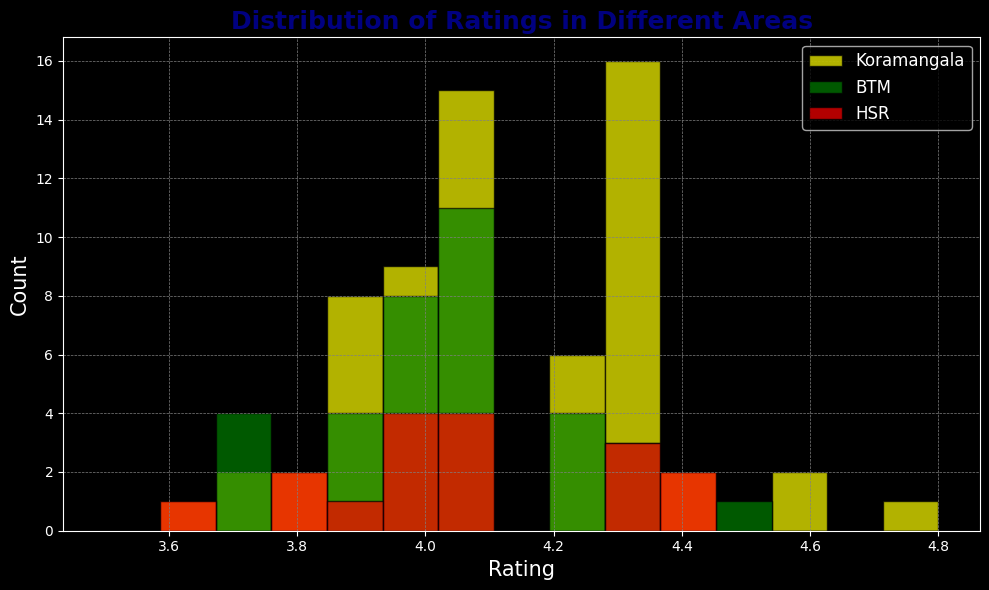

In [ ]:
fig, ax = plt.subplots(figsize=(10, 6))
ax.hist(df_Koramangala['Rating'], label="Koramangala", alpha=.7,
        edgecolor='black', color='yellow', bins=15, range=(3.5, 4.8))
ax.hist(df_BTM['Rating'], label="BTM", alpha=.7,
        edgecolor='black', color='green', bins=15, range=(3.5, 4.8))
ax.hist(df_HSR['Rating'], label='HSR', alpha=.7,
        edgecolor='black', color='red', bins=15, range=(3.5, 4.8))

ax.set_title('Distribution of Ratings in Different Areas', fontsize=18, fontweight='bold', color='navy')
ax.set_xlabel('Rating', fontsize=15)
ax.set_ylabel('Count', fontsize=15)

ax.legend(fontsize=12)
ax.grid(True, which='both', linestyle='--', linewidth=0.5, color='grey')
plt.tight_layout()

plt.show()


### Conclusion
1. BTM : Most has 3.9 to 4.1 Rating and Approx. Cost for Two People lies between 200 to 350. (Max. Cost goes upto 600)
2. HSR : Most has 4 or above Rating and Approx. Cost for Two People lies between 300 to 400. (Max. Cost goes upto 800)
3. Koramangala : Most has 4.0 to 4.4 Rating and Approx. Cost for Two People lies between 200 to 350. (Max. Cost goes upto 600)

In [ ]:
#High rated restaurants
df_Highest_Rated_Restaurants = df_swiggy[df_swiggy['Rating'] >= 4.0]
df_Highest_Rated_Restaurants

,Shop_Name,Cuisine,Location,Rating,Cost_for_Two(₹),Area
0,Kanti Sweets,Sweets,Koramangala,4.3,150,Koramangala
1,Mumbai Tiffin,"North Indian, Home Food, Thalis, Combo",Sector 5,4.4,400,HSR
2,Sri Krishna sagar,"South Indian, North Indian, Fast Food, Beverag...",6th Block,4.1,126,Koramangala
3,Al Daaz,"American, Arabian, Chinese, Desserts, Fast Foo...",HSR,4.4,400,HSR
4,Beijing Bites,"Chinese, Thai",5th Block,4.1,450,Koramangala
...,...,...,...,...,...,...
111,Bowl 99,"North Indian, South Indian",kormangala,4.4,200,Koramangala
114,Savoury Restaurant,"Arabian, Middle Eastern, North Indian, Grill, ...",Madiwala,4.1,600,BTM
115,Royal Treat,"North Indian, Chinese, Seafood, Biryani",5th block Koramangala,4.2,193,Koramangala
116,Thali 99,North Indian,Koramangala,4.3,200,Koramangala


In [ ]:
df_Highest_Rated_Restaurants = df_Highest_Rated_Restaurants.loc[:, ['Shop_Name', 'Rating', 'Cost_for_Two(₹)']]
df_Highest_Rated_Restaurants

,Shop_Name,Rating,Cost_for_Two(₹)
0,Kanti Sweets,4.3,150
1,Mumbai Tiffin,4.4,400
2,Sri Krishna sagar,4.1,126
3,Al Daaz,4.4,400
4,Beijing Bites,4.1,450
...,...,...,...
111,Bowl 99,4.4,200
114,Savoury Restaurant,4.1,600
115,Royal Treat,4.2,193
116,Thali 99,4.3,200


In [ ]:
df_Highest_Rated_Restaurants = df_Highest_Rated_Restaurants.groupby(['Shop_Name', 'Rating'])['Cost_for_Two(₹)'].agg('mean')
df_Highest_Rated_Restaurants = df_Highest_Rated_Restaurants.reset_index()
df_Highest_Rated_Restaurants

,Shop_Name,Rating,Cost_for_Two(₹)
0,99 VARIETY DOSA AND JUICE-Malli mane food court,4.1,100.0
1,99 VARIETY DOSA AND PAV BHAJI- Malli Mane Food...,4.1,200.0
2,A2B - Adyar Ananda Bhavan,4.2,450.0
3,Abhiruchi Hotel,4.0,250.0
4,Al Daaz,4.4,400.0
...,...,...,...
86,Venu's Donne Biryani,4.3,300.0
87,WarmOven Cake & Desserts,4.1,200.0
88,World of asia,4.0,250.0
89,XO Belgian Waffle,4.3,250.0


In [ ]:
fig = px.scatter(x=df_Highest_Rated_Restaurants['Cost_for_Two(₹)'],
                 y=df_Highest_Rated_Restaurants['Rating'],
                 color=df_Highest_Rated_Restaurants['Rating'],
                size=df_Highest_Rated_Restaurants['Cost_for_Two(₹)'],
                labels = {'x' : 'Approx. Cost_for_Two(₹)', 'y' : 'Rating', 'color' : 'Rating_Indicator'})
fig.update_layout(title = "Analyse 'Approx Cost of 2 People' vs 'Rating'")
fig.show()

In [ ]:
# Revenue Analysis
Revenue={}

Revenue['BTM']=df_BTM['Cost_for_Two(₹)'].sum()
Revenue['HSR']=df_HSR['Cost_for_Two(₹)'].sum()
Revenue['Koramangala']=df_Koramangala['Cost_for_Two(₹)'].sum()

Re=Revenue.values()
city=Revenue.keys()

Revenue=pd.DataFrame()
Revenue['Revenue'] = Re
Revenue['City'] = city
Revenue

,Revenue,City
0,11518,BTM
1,7000,HSR
2,19061,Koramangala


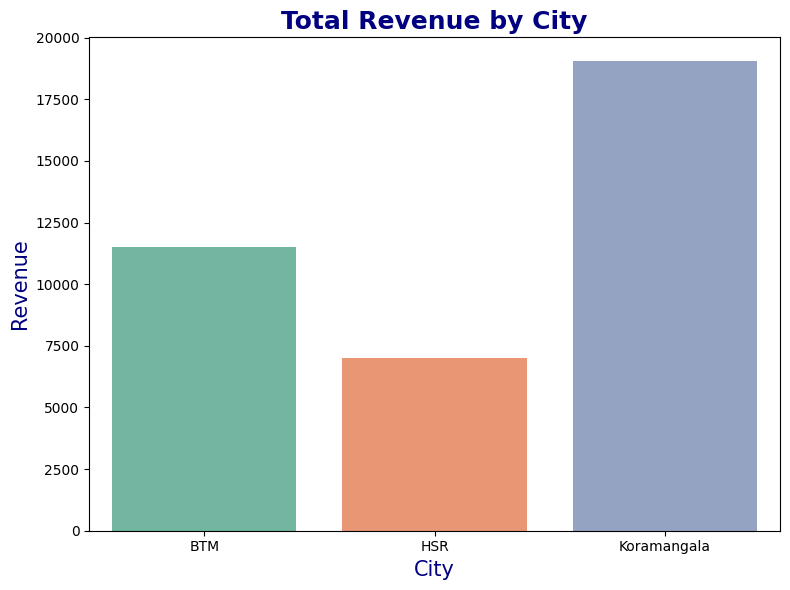

In [ ]:
plt.figure(figsize=(8, 6))

sns.barplot(x='City', y='Revenue', hue='City', data=Revenue, palette='Set2')
plt.xlabel('City', fontsize=15, color='navy')
plt.ylabel('Revenue', fontsize=15, color='navy')
plt.title('Total Revenue by City', fontsize=18, fontweight='bold', color='navy')

plt.tight_layout()
plt.show()


### Conclusion
High revenue generating area is Koramangala and the Least is HSR.

In [ ]:
# Top 15 Restaurant with highest rating with approx cost of 2 members
df_Expensive_Restaurants = df_Highest_Rated_Restaurants.sort_values(by = 'Cost_for_Two(₹)', ascending = False)
df_Expensive_Restaurants

,Shop_Name,Rating,Cost_for_Two(₹)
67,Punjabi Rasoi,4.0,800.0
26,Dindigul Thalapakatti Biriyani,4.1,650.0
73,Savoury Restaurant,4.1,600.0
81,Taco Bell,4.3,600.0
66,Pizza Hut,4.0,600.0
...,...,...,...
49,Maa Di Hatti,4.0,129.0
77,Sri Krishna sagar,4.1,126.0
56,NIC Natural Ice Creams,4.2,120.0
82,Tandoori Merchant,4.2,100.0


In [ ]:
fig = px.bar(data_frame = df_Expensive_Restaurants,
             x = df_Expensive_Restaurants['Shop_Name'][0:15],
             y = df_Expensive_Restaurants['Cost_for_Two(₹)'][0:15],
             color = df_Expensive_Restaurants['Rating'][0:15],
            labels = {'x' : 'Restaurant Name', 'y' : 'Approx. Cost for Two (₹)', 'color' : 'Rating'})
fig.update_layout(template = 'plotly_dark',
                  title = 'Top 15 Expensive & Highest Rated Restaurants with Approx. Cost for 2 People')
fig.show()

Affordable and Highest Rating Restaurants

In [ ]:
df_Affordable_Restaurants = df_swiggy[(df_swiggy['Cost_for_Two(₹)'] <= 500) & (df_swiggy['Rating'] >= 4.0)]
df_Affordable_Restaurants

,Shop_Name,Cuisine,Location,Rating,Cost_for_Two(₹),Area
0,Kanti Sweets,Sweets,Koramangala,4.3,150,Koramangala
1,Mumbai Tiffin,"North Indian, Home Food, Thalis, Combo",Sector 5,4.4,400,HSR
2,Sri Krishna sagar,"South Indian, North Indian, Fast Food, Beverag...",6th Block,4.1,126,Koramangala
3,Al Daaz,"American, Arabian, Chinese, Desserts, Fast Foo...",HSR,4.4,400,HSR
4,Beijing Bites,"Chinese, Thai",5th Block,4.1,450,Koramangala
...,...,...,...,...,...,...
110,Biryani Pot,"North Indian, Biryani",Madiwala Junction,4.0,500,BTM
111,Bowl 99,"North Indian, South Indian",kormangala,4.4,200,Koramangala
115,Royal Treat,"North Indian, Chinese, Seafood, Biryani",5th block Koramangala,4.2,193,Koramangala
116,Thali 99,North Indian,Koramangala,4.3,200,Koramangala


In [ ]:
import warnings
warnings.filterwarnings(action='ignore')

df_Affordable_Restaurants.sort_values(by = ['Rating'], ascending = False, inplace = True)
df_Affordable_Restaurants=df_Affordable_Restaurants.head(10)
df_Affordable_Restaurants

,Shop_Name,Cuisine,Location,Rating,Cost_for_Two(₹),Area
78,Khichdi Experiment,"Home Food, Healthy Food, Indian",Koramangala,4.8,200,Koramangala
82,Natural Ice Cream,Ice Cream,Near Wipro Park Signal,4.6,150,Koramangala
94,Corner House Ice Cream,"Ice Cream, Desserts",7th Block,4.6,250,Koramangala
80,Chinese Bae,"Chinese, Thai",BTM,4.5,450,BTM
3,Al Daaz,"American, Arabian, Chinese, Desserts, Fast Foo...",HSR,4.4,400,HSR
111,Bowl 99,"North Indian, South Indian",kormangala,4.4,200,Koramangala
1,Mumbai Tiffin,"North Indian, Home Food, Thalis, Combo",Sector 5,4.4,400,HSR
77,Leon Grill,"Turkish, Portuguese, American, Grill",5th Block,4.3,300,Koramangala
40,Venu's Donne Biryani,Biryani,Chocolate Factory Road,4.3,300,BTM
41,Cakewala,Desserts,HSR,4.3,450,HSR


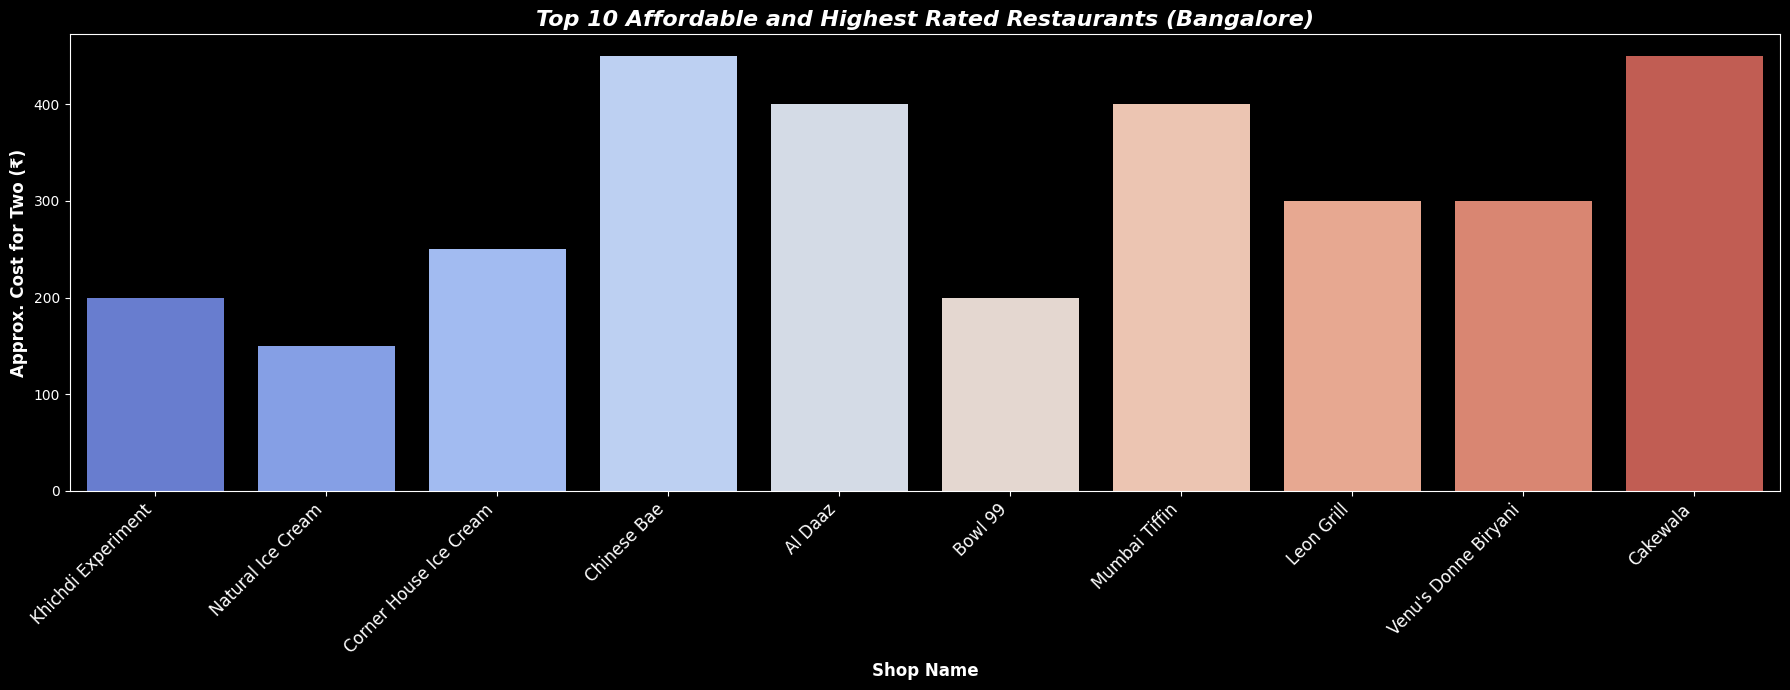

In [ ]:
plt.figure(figsize=(18, 7))

sns.barplot(x='Shop_Name', y='Cost_for_Two(₹)', data=df_Affordable_Restaurants, palette='coolwarm')

plt.title('Top 10 Affordable and Highest Rated Restaurants (Bangalore)', fontsize=16, fontweight='bold', fontstyle='italic')
plt.xlabel('Shop Name', fontsize=12, fontweight='bold')
plt.ylabel('Approx. Cost for Two (₹)', fontsize=12, fontweight='bold')

plt.xticks(rotation=45, ha='right', fontsize=12)


plt.tight_layout()
plt.show()



# Cuisine Analysis

In [ ]:
freq_dict={}
for i in df_swiggy['Cuisine'].unique():
    Cuisines_Lists = i.split(',')
    for Cuisine in Cuisines_Lists:
        Cuisine = Cuisine.lstrip(' ')
        if Cuisine in freq_dict:
            freq_dict[Cuisine] = freq_dict[Cuisine] + 1
        else:
            freq_dict[Cuisine] = 1

print(freq_dict)
print()
print('Total Records: \t', len(freq_dict))

{'Sweets': 2, 'North Indian': 32, 'Home Food': 2, 'Thalis': 1, 'Combo': 1, 'South Indian': 23, 'Fast Food': 16, 'Beverages': 9, 'Jain': 2, 'American': 8, 'Arabian': 4, 'Chinese': 35, 'Desserts': 15, 'Mughlai': 7, 'Thai': 2, 'Italian': 4, 'Kerala': 6, 'Pizzas': 5, 'Mexican': 3, 'Andhra': 12, 'Seafood': 8, 'Biryani': 18, 'Indian': 5, 'Rajasthani': 1, 'Bakery': 2, 'Healthy Food': 4, 'Hyderabadi': 5, 'Snacks': 4, 'Turkish': 2, 'Portuguese': 2, 'Chaat': 2, 'Asian': 3, 'Continental': 3, 'Mediterranean': 1, 'Lebanese': 1, 'Cafe': 2, 'Salads': 2, 'Pastas': 1, 'Punjabi': 2, 'Juices': 2, 'Kebabs': 2, 'Grill': 2, 'Ice Cream': 2, 'Tandoor': 1, 'Chettinad': 2, 'Pan-Asian': 2, 'Oriental': 1, 'Middle Eastern': 1}

Total Records: 	 48


In [ ]:
cuisine = freq_dict.keys()
freq = freq_dict.values()
df_cusine_analysis = pd.DataFrame()
df_cusine_analysis['Cuisine'] = cuisine
df_cusine_analysis['Count'] = freq

In [ ]:
fig = px.bar(data_frame =df_cusine_analysis,
            x = df_cusine_analysis['Cuisine'],
            y = df_cusine_analysis['Count'],
             color = df_cusine_analysis['Count'],
            labels = {'x' : 'Cusine', 'y' : 'Count', 'color' : 'Count'})
fig.update_layout(template = 'plotly_dark',
                  title ="Cuisines Overall Analysis (Bangalore)")
fig.show()

In [ ]:
fig = px.pie(data_frame = df_cusine_analysis,
             names = df_cusine_analysis['Cuisine'],
             values = df_cusine_analysis['Count'],
             title = 'Overall Distribution of Cuisines in Bangalore Restaurants')
fig.update_traces(textposition = 'inside', textinfo = 'percent+label')
fig.update_layout(template = 'plotly_dark')
fig.show()

### Conclusion
From the above Visualizations, We can say, Most of the Resturants sell "Chinese" which is around '12.9%' followed by "North Indian" & "South Indian" Cuisines which are around '11.8%' & '8.46%'.

## Area Wise Cuisine Analysis

## BTM

In [ ]:
freq_BTM = {}
for i in df_BTM['Cuisine'].unique():
    Cuisine_List = i.split(',')
    for Cuisine in Cuisine_List:
        Cuisine = Cuisine.lstrip()
        if Cuisine in freq_BTM:
            freq_BTM[Cuisine] = freq_BTM[Cuisine] + 1
        else:
            freq_BTM[Cuisine] = 1

Cuisine = freq_BTM.keys()
freq = freq_BTM.values()
df_cusine_btm = pd.DataFrame()
df_cusine_btm['Cuisine']=Cuisine
df_cusine_btm['Count']=freq

fig = px.pie(data_frame = df_cusine_btm,
             names = df_cusine_btm['Cuisine'],
             values = df_cusine_btm['Count'],
             title = 'Distribution of Cuisines in BTM Bangalore Restaurants')

fig.update_traces(textposition = 'inside', textinfo = 'percent+label')
fig.update_layout(template = 'plotly_dark')
fig.show()

### Conclusion
From the above Visualizations, We can say, In BTM Area, Most of the Resturants sell "Chinese" which is around '17.1%' followed by "North Indian" & "South Indian" Cuisines which are around '15.2%' & '9.52%'.

## HSR

In [ ]:
freq_HSR = {}
for i in df_HSR['Cuisine'].unique():
    Cuisine_List = i.split(',')
    for Cuisine in Cuisine_List:
        Cuisine = Cuisine.lstrip()
        if Cuisine in freq_HSR:
            freq_HSR[Cuisine] = freq_HSR[Cuisine] + 1
        else:
            freq_HSR[Cuisine] = 1

Cuisine = freq_HSR.keys()
freq = freq_HSR.values()
dict_HSR = {
    'Cuisine' : Cuisine,
    'Count' : freq
}

df_Cuisine_HSR = pd.DataFrame(dict_HSR)

fig = px.pie(data_frame = df_Cuisine_HSR,
             names = df_Cuisine_HSR['Cuisine'],
             values = df_Cuisine_HSR['Count'],
             title = 'Distribution of Cuisines in HSR Bangalore Restaurants')

fig.update_traces(textposition = 'inside', textinfo = 'percent+label')
fig.update_layout(template = 'plotly_dark')
fig.show()

### Conclusion
From the above Visualizations, We can say, In HSR Area, "North Indian" Cuisines are dominated by around '14.3%' followed by "Chinese" & "South Indian" Cuisines '9.52%' & '9.52%' Restaurants respectively.
So, We can also infer that - In HSR Area, We may have more "North Indian" people staying there.

## Koramangala

In [ ]:
freq_Koramangala = {}
for i in df_Koramangala['Cuisine'].unique():
    Cuisine_List = i.split(',')
    for Cuisine in Cuisine_List:
        Cuisine = Cuisine.lstrip()
        if Cuisine in freq_Koramangala:
            freq_Koramangala[Cuisine] = freq_Koramangala[Cuisine] + 1
        else:
            freq_Koramangala[Cuisine] = 1

Cuisine = freq_Koramangala.keys()
freq = freq_Koramangala.values()
dict_Koramangala = {
    'Cuisine' : Cuisine,
    'Count' : freq
}

df_Cuisine_Koramangala = pd.DataFrame(dict_Koramangala)

fig = px.pie(data_frame = df_Cuisine_Koramangala,
             names = df_Cuisine_Koramangala['Cuisine'],
             values = df_Cuisine_Koramangala['Count'],
             title = 'Distribution of Cuisines in Koramangala Bangalore Restaurants')

fig.update_traces(textposition = 'inside', textinfo = 'percent+label')
fig.update_layout(template = 'plotly_dark')
fig.show()

### Conclusion
From the above Visualizations, We can say, In Koramangala Area, "Chinese" Cuisines are dominated by around '10.3%' followed by "North Indian" & "South Indian" Cuisines '9.66%' & '7.59%' Restaurants respectively.